In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.mode.chained_assignment = None  # default='warn'

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
st_path = '/kaggle/input/spaceship-titanic/train.csv'
st_data = pd.read_csv(st_path)
st_data.head

<bound method NDFrame.head of      PassengerId HomePlanet CryoSleep     Cabin    Destination   Age    VIP  \
0        0001_01     Europa     False     B/0/P    TRAPPIST-1e  39.0  False   
1        0002_01      Earth     False     F/0/S    TRAPPIST-1e  24.0  False   
2        0003_01     Europa     False     A/0/S    TRAPPIST-1e  58.0   True   
3        0003_02     Europa     False     A/0/S    TRAPPIST-1e  33.0  False   
4        0004_01      Earth     False     F/1/S    TRAPPIST-1e  16.0  False   
...          ...        ...       ...       ...            ...   ...    ...   
8688     9276_01     Europa     False    A/98/P    55 Cancri e  41.0   True   
8689     9278_01      Earth      True  G/1499/S  PSO J318.5-22  18.0  False   
8690     9279_01      Earth     False  G/1500/S    TRAPPIST-1e  26.0  False   
8691     9280_01     Europa     False   E/608/S    55 Cancri e  32.0  False   
8692     9280_02     Europa     False   E/608/S    TRAPPIST-1e  44.0  False   

      RoomService  Fo

In [3]:
st_data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [4]:
st_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [5]:
# Better to fill up blanks using interpolate
st_data.Age = st_data.Age.interpolate()
st_data.RoomService = st_data.RoomService.interpolate()
st_data.FoodCourt = st_data.FoodCourt.interpolate()
st_data.ShoppingMall = st_data.ShoppingMall.interpolate()
st_data.Spa = st_data.Spa.interpolate()
st_data.VRDeck = st_data.VRDeck.interpolate()


In [6]:
# bad practice to drop data as it reduces models accuracy, learn better methods
# learn how to exteact data drom cabin
cols = ['Name','Cabin','PassengerId']
st_data = st_data.drop(cols,axis = 1)
st_data = st_data.dropna()
st_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7913 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    7913 non-null   object 
 1   CryoSleep     7913 non-null   object 
 2   Destination   7913 non-null   object 
 3   Age           7913 non-null   float64
 4   VIP           7913 non-null   object 
 5   RoomService   7913 non-null   float64
 6   FoodCourt     7913 non-null   float64
 7   ShoppingMall  7913 non-null   float64
 8   Spa           7913 non-null   float64
 9   VRDeck        7913 non-null   float64
 10  Transported   7913 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 687.8+ KB


In [7]:
st_data.HomePlanet.unique()
st_data.CryoSleep.unique()
st_data.Destination.unique()
st_data.VIP.unique()

array([False, True], dtype=object)

In [8]:
# convert objects to float 

st_data.HomePlanet = st_data.HomePlanet.astype("string")
st_data.Destination = st_data.Destination.astype("string")
st_data.CryoSleep = st_data.CryoSleep.astype(float)
st_data.VIP = st_data.VIP.astype(float)
st_data.Transported = st_data.Transported.astype(int)

In [9]:
print(st_data.HomePlanet.dtype)
print(st_data.Destination.dtype)
print(st_data.CryoSleep.dtype)
print(st_data.VIP.dtype)
print(st_data.Transported.dtype)

string
string
float64
float64
int64


In [10]:
st_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7913 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    7913 non-null   string 
 1   CryoSleep     7913 non-null   float64
 2   Destination   7913 non-null   string 
 3   Age           7913 non-null   float64
 4   VIP           7913 non-null   float64
 5   RoomService   7913 non-null   float64
 6   FoodCourt     7913 non-null   float64
 7   ShoppingMall  7913 non-null   float64
 8   Spa           7913 non-null   float64
 9   VRDeck        7913 non-null   float64
 10  Transported   7913 non-null   int64  
dtypes: float64(8), int64(1), string(2)
memory usage: 741.8 KB


In [11]:
# st_data.HomePlanet.unique()
# def HomePlanettoNewCol(row):
#     if str(row.HomePlanet)=='Earth':
#         row['Earth'] = 1
#         row['Europa'] = 0
#         row['Mars'] = 0
#     elif str(row.HomePlanet)=='Europa':
#         row['Earth'] = 0
#         row['Europa'] = 1
#         row['Mars'] = 0
#     elif str(row.HomePlanet)=='Mars':
#         row['Earth'] = 0
#         row['Europa'] = 0
#         row['Mars'] = 1
# st_data.apply(HomePlanettoNewCol,axis=1)
# st_data[['Earth','Europa','Mars']].head

In [12]:
dummy = []
cols = ['HomePlanet','Destination']
for i in cols:
    dummy.append(pd.get_dummies(st_data[i]))
st_dummy = pd.concat(dummy,axis=1)
st_data = pd.concat((st_data,st_dummy),axis = 1)
st_data = st_data.drop(cols,axis=1)
st_data.columns


Index(['CryoSleep', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
       'Spa', 'VRDeck', 'Transported', 'Earth', 'Europa', 'Mars',
       '55 Cancri e', 'PSO J318.5-22', 'TRAPPIST-1e'],
      dtype='object')

In [13]:
st_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7913 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CryoSleep      7913 non-null   float64
 1   Age            7913 non-null   float64
 2   VIP            7913 non-null   float64
 3   RoomService    7913 non-null   float64
 4   FoodCourt      7913 non-null   float64
 5   ShoppingMall   7913 non-null   float64
 6   Spa            7913 non-null   float64
 7   VRDeck         7913 non-null   float64
 8   Transported    7913 non-null   int64  
 9   Earth          7913 non-null   uint8  
 10  Europa         7913 non-null   uint8  
 11  Mars           7913 non-null   uint8  
 12  55 Cancri e    7913 non-null   uint8  
 13  PSO J318.5-22  7913 non-null   uint8  
 14  TRAPPIST-1e    7913 non-null   uint8  
dtypes: float64(8), int64(1), uint8(6)
memory usage: 664.6 KB


In [14]:
y = st_data.Transported
st_data = st_data.drop('Transported',axis = 1)
X = st_data

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

train_X,val_X,train_y,val_y = train_test_split(X,y,random_state = 1)

In [16]:
rf_model = RandomForestClassifier(random_state = 1)
# rf_model = DecisionTreeClassifier(random_state = 1)
rf_model.fit(train_X.values,train_y.values)
prediction = rf_model.predict(val_X.values)

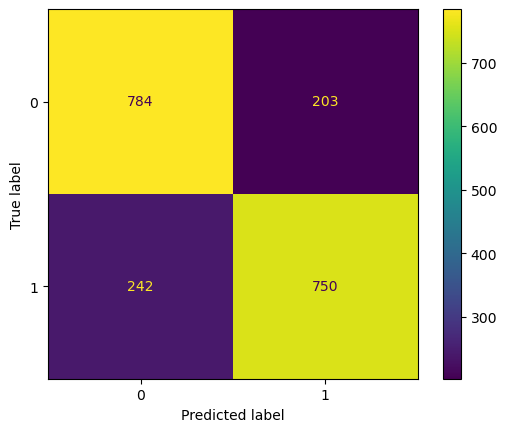

In [17]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score
import matplotlib.pyplot as plt
titanic_confusion_matrix = confusion_matrix(val_y,prediction)
disp = ConfusionMatrixDisplay(confusion_matrix=titanic_confusion_matrix)
disp.plot()
plt.show()

In [18]:
accuracy = accuracy_score(val_y,prediction)
print(accuracy)

0.7751389590702374
